In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy
import seaborn as sns
sns.set_style('darkgrid')

import torch 
import torchvision           
import torch.nn as nn         
import torch.utils.data as data  
import torchvision.transforms as transforms
import torchvision.datasets as dsets 

In [2]:
class Classification(nn.Module):
    
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super().__init__()
        
        self.layer1 = nn.Linear(inputSize, hidden_size1)     
        self.layer2 = nn.Linear(hidden_size1, hidden_size2) 
        self.relu = nn.ReLU() 
                
        self.layer3 = nn.Linear(hidden_size2, num_classes)
        self.softmax = nn.Softmax(dim=1) # Оскільки завдання класифікації, то функція активації softmax

    def forward(self, x): 
        
        out = self.layer1(x)  # перший шар
        out = self.relu(out) # функціz активації першого шару
        
        out = self.layer2(out) # другий шар
        out = self.relu(out) # функціz активації другого шару
        
        out = self.layer3(out) # третій шар
        out = self.softmax(out) # функцію активації третього шару
        
        return out

In [3]:
def count_error(numEpochs):
    
    for epoch in range(numEpochs): # кількість епох
        lossTot = 0 # втрати в сукупності

        for i, (images, labels) in enumerate(trainLoader): # проходимося за всіма даними в batch
            images = images.view(-1, 28*28) # наводимо до правильного формату для сітки
            optimizer.zero_grad() # обнулюємо градієнт
            outputs = model(images) # тут наше передбачення
            loss = criterion(outputs.log(), labels) # рахуємо похибку 
            loss.backward()  # зворотне поширення. 
                         # x.grad += dloss/dx для всіх параметрів x

            lossTot +=loss.detach().data # інкремент помилки
        
            optimizer.step() # наступний крок спуску

        losses.append(lossTot/len(trainDataset)) # обчислюємо середню помилку та додаємо до списку
        print('Епоха: [%d/%d], Похибка: %.4f' 
           % (epoch+1, numEpochs, loss))

    # Графік навчання
    plt.figure(figsize=(10,5))
    plt.plot(losses)            
    plt.show()

In [4]:
def count_accur():
    correct = 0
    total = 0

    model.eval() # режим перевірки

    for images, labels in testLoader: # ітеруємо по перевірочному датасету
        images = images.view(-1, 28*28) # наводимо до потрібного формату
        result = labels
        outputs = model(images) # робимо прогноз
        _, predicted = torch.max(outputs.data, 1) # _ максимальне значення пропускаємо, нас цікавить, що це за цифра
        total += labels.size(0) # 0 - перше/єдине значення
        correct += (predicted == labels).sum() 
    
    print('Точність: %.2f' % (correct / total))

In [5]:
# MNIST loading

inputSize = 784
batchSize = 100

# Навчальна вибірка
trainDataset = dsets.MNIST(root='C:/Users/MyWork/PycharmProjects/HW54_DL_PyTorch/', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)
# Тестова вибірка
testDataset = dsets.MNIST(root='C:/Users/MyWork/PycharmProjects/HW54_DL_PyTorch/', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (підготовка даних для мережі)
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, # Який датасет
                                           batch_size=batchSize, # На скільки batch поділено
                                           shuffle=True) 

testLoader = torch.utils.data.DataLoader(dataset=testDataset, #  Який датасет
                                          batch_size=batchSize, # На скільки batch поділено
                                          shuffle=False)

In [6]:
# dataset

dataIter = iter(trainLoader)    # Якою вибіркою пройдемося
trainX, trainY = next(dataIter) # Привласнюємо поточний batch

In [7]:
trainX.shape

torch.Size([100, 1, 28, 28])

In [8]:
trainX.view(-1, 28*28).shape # view операція ідентична reshape, за винятком, що вона змінює розмір масиву тільки для даної і

torch.Size([100, 784])

In [9]:
trainX.size()

torch.Size([100, 1, 28, 28])

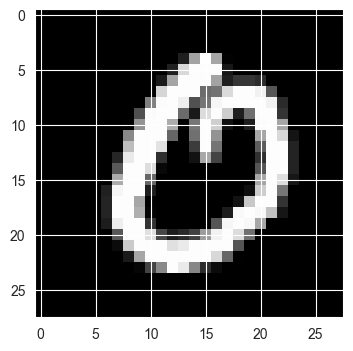

In [10]:
plt.figure(figsize=(8,4))
plt.imshow(trainX[10, 0], cmap='gray')
plt.show()

In [11]:
# створення об'єкту мережі

numClasses = 10
hidden1 = 500
hidden2 = 50

model = Classification(inputSize, hidden1, hidden2, numClasses) 

Епоха: [1/15], Похибка: 2.2749
Епоха: [2/15], Похибка: 2.1985
Епоха: [3/15], Похибка: 2.0936
Епоха: [4/15], Похибка: 1.9726
Епоха: [5/15], Похибка: 1.5309
Епоха: [6/15], Похибка: 1.2527
Епоха: [7/15], Похибка: 0.9138
Епоха: [8/15], Похибка: 0.9217
Епоха: [9/15], Похибка: 0.8329
Епоха: [10/15], Похибка: 0.6111
Епоха: [11/15], Похибка: 0.6629
Епоха: [12/15], Похибка: 0.4715
Епоха: [13/15], Похибка: 0.4139
Епоха: [14/15], Похибка: 0.3751
Епоха: [15/15], Похибка: 0.5810


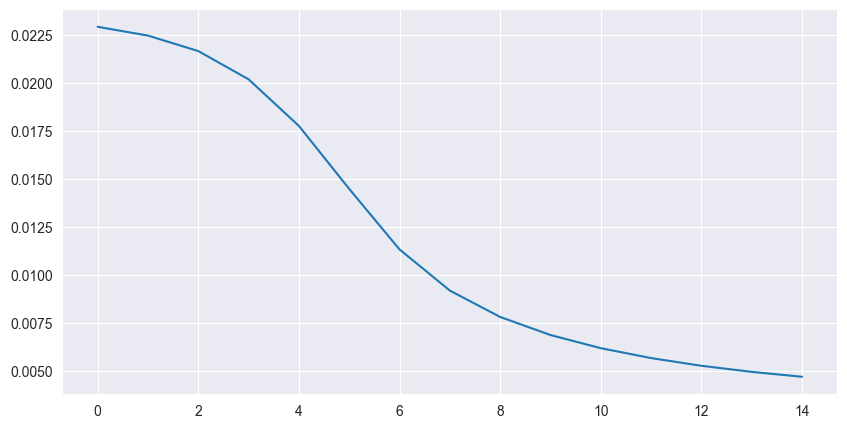

Точність: 0.88


In [12]:
# навчання моделі
# оцінка похибки - CrossEntropy
# оптимізатор - SGD

numEpochs = 15
learningRate = 0.002 

criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)  

model.train() # режим навчання

losses = [] 
count_error(numEpochs)
count_accur()

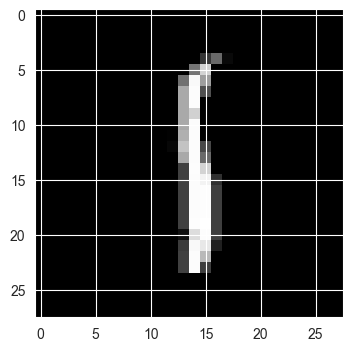

Правильна відповідь tensor(1)


In [13]:
plt.figure(figsize=(8,4))
plt.imshow(trainX[14, 0], cmap='gray')
plt.show()
print('Правильна відповідь', trainY[14])

In [14]:
x = model(trainX[14].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # відповідь у вигляді ймовірностей

tensor([[1.0403e-04, 9.0478e-01, 1.2095e-02, 1.6954e-02, 8.3491e-03, 1.0500e-02,
         9.7628e-03, 5.7415e-03, 2.6709e-02, 5.0087e-03]])
torch.return_types.max(
values=tensor([0.9048]),
indices=tensor([1]))


Епоха: [1/10], Похибка: 0.0325
Епоха: [2/10], Похибка: 0.0826
Епоха: [3/10], Похибка: 0.0090
Епоха: [4/10], Похибка: 0.0405
Епоха: [5/10], Похибка: 0.0124
Епоха: [6/10], Похибка: 0.0893
Епоха: [7/10], Похибка: 0.0043
Епоха: [8/10], Похибка: 0.0029
Епоха: [9/10], Похибка: 0.0018
Епоха: [10/10], Похибка: 0.0132


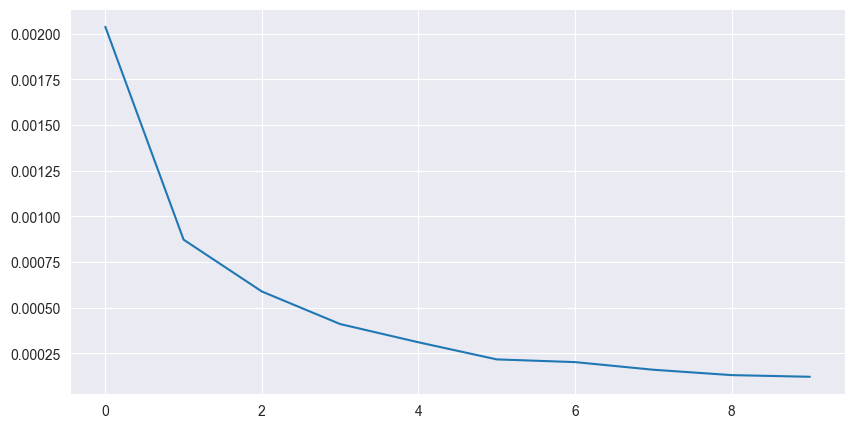

Точність: 0.98


In [15]:
# навчання моделі
# оцінка похибки - CrossEntropy
# оптимізатор - Adam

numClasses = 10
hidden1 = 500
hidden2 = 50
numEpochs = 10
learningRate = 0.001 

criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)  # оптимізатор

model.train() # режим навчання (опціонально)

losses = [] 
count_error(numEpochs)
count_accur()

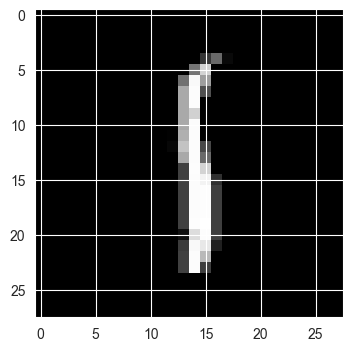

Правильна відповідь tensor(1)


In [16]:
plt.figure(figsize=(8,4))
plt.imshow(trainX[14, 0], cmap='gray')
plt.show()
print('Правильна відповідь', trainY[14])

In [17]:
x = model(trainX[14].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # відповідь у вигляді ймовірностей

tensor([[2.2294e-12, 9.9918e-01, 1.2640e-08, 1.4373e-07, 5.1292e-05, 2.8226e-04,
         4.1021e-05, 8.5388e-07, 4.4752e-04, 5.6960e-07]])
torch.return_types.max(
values=tensor([0.9992]),
indices=tensor([1]))
